In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# import imblearn as imb
import sklearn as sl
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier,IsolationForest,GradientBoostingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import spacy
nlp = spacy.load("en_core_web_sm")
import re



In [2]:
df = pd.read_csv(r"E:\ml data\spam.csv", encoding='latin1')  # or 'ISO-8859-1'
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ?_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
to_drop=df.iloc[0:,-3:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 2  50 non-null     object
 1   Unnamed: 3  12 non-null     object
 2   Unnamed: 4  6 non-null      object
dtypes: object(3)
memory usage: 130.7+ KB


In [4]:
to_drop1 = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]

#### Data Preprocessing

In [5]:
df= df.drop(df[to_drop1],axis=1)
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ?_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [6]:
df=df.drop_duplicates()

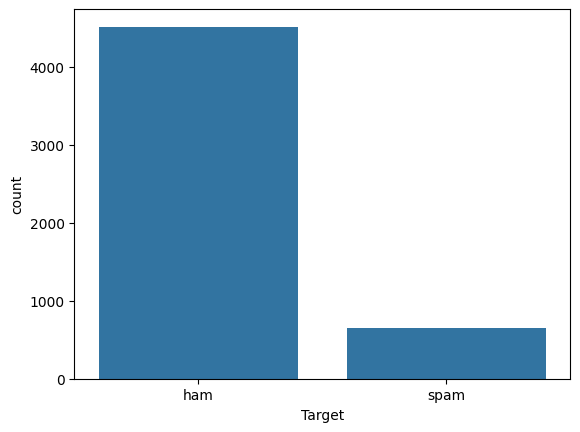

In [7]:
sns.countplot(data=df,x='Target')
plt.show()

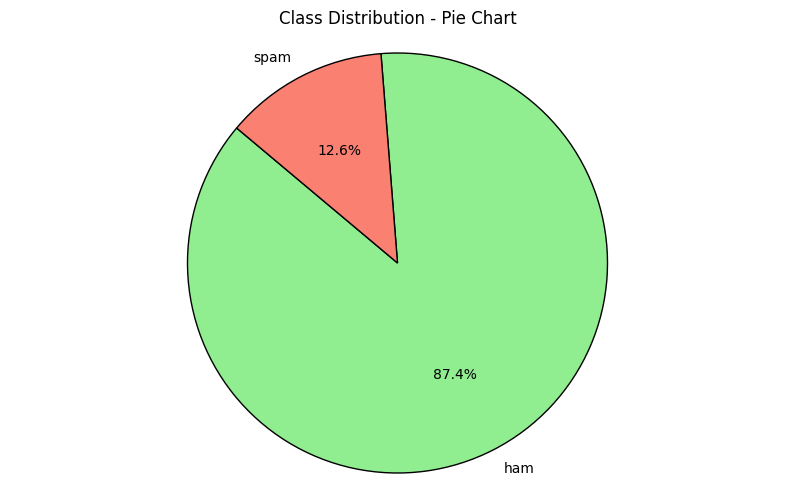

In [12]:


# Assuming your target column is named 'target'
labels = df['Target'].value_counts().index
sizes = df['Target'].value_counts().values

# Optional: Custom colors
colors = [ 'lightgreen', 'salmon']  # Adjust based on number of classes

# Plotting the pie chart
plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Class Distribution - Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [7]:
le=LabelEncoder()
df["Target"]=le.fit_transform(df["Target"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_138232\3675789135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"]=le.fit_transform(df["Target"])


In [8]:
df["No of Characters"]=df["Text"].apply(len)
df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_138232\4190180584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No of Characters"]=df["Text"].apply(len)


,Target,Text,No of Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ?_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [9]:
def get_counts(text):
    doc = nlp(text)
    return len([token for token in doc if token.is_alpha]), len(list(doc.sents))

df["NO of Words"],df["No of Sentences"]= zip(*df["Text"].map(get_counts))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_138232\3799815600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NO of Words"],df["No of Sentences"]= zip(*df["Text"].map(get_counts))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_138232\3799815600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NO of Words"],df["No of Sentences"]= zip(*df["Text"].map(get_counts))


In [11]:
df[['No of Characters', 'NO of Words', 'No of Sentences']].describe()

,No of Characters,NO of Words,No of Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.894177,14.377829,2.130586
std,58.162207,10.381026,1.465869
min,2.000000,0.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,116.000000,20.000000,3.000000
max,910.000000,167.000000,27.000000


In [18]:
df[df['Target']==0][['No of Characters', 'NO of Words', 'No of Sentences']].describe()

,No of Characters,NO of Words,No of Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.424048,13.613375,1.990700
std,56.337668,10.677648,1.411518
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,10.000000,2.000000
75%,90.000000,18.000000,2.000000
max,910.000000,167.000000,27.000000


In [19]:
df[df['Target']==1][['No of Characters', 'NO of Words', 'No of Sentences']].describe()

,No of Characters,NO of Words,No of Sentences
count,653.000000,653.000000,653.000000
mean,137.471669,19.664625,3.098009
std,30.019848,5.712642,1.470428
min,13.000000,0.000000,1.000000
25%,131.000000,17.000000,2.000000
50%,148.000000,21.000000,3.000000
75%,157.000000,23.000000,4.000000
max,223.000000,33.000000,9.000000


In [12]:
print(df.columns.tolist())


['Target', 'Text', 'No of Characters', 'NO of Words', 'No of Sentences']


<Figure size 2000x1200 with 0 Axes>

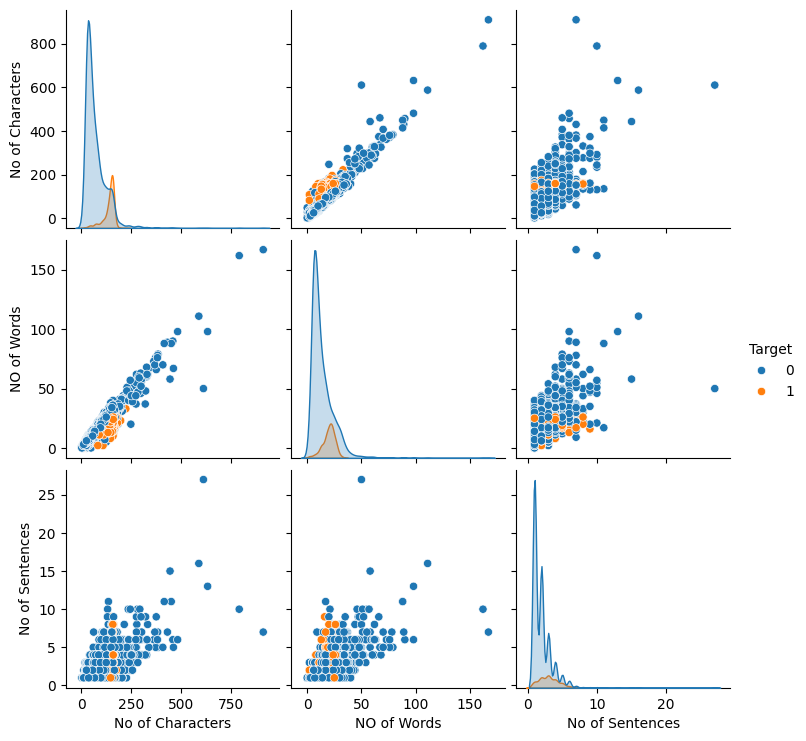

In [22]:

plt.figure(figsize=[20,12])
sns.pairplot(data=df,hue='Target')
plt.show()

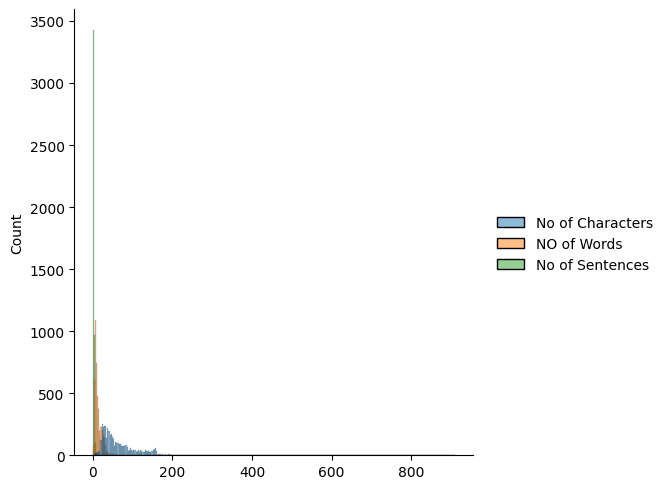

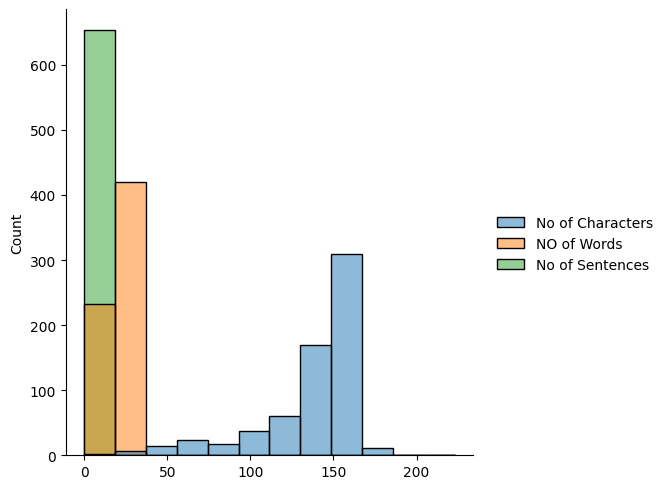

In [23]:
sns.displot(df[df['Target']==0][['No of Characters', 'NO of Words', 'No of Sentences']])
sns.displot(df[df['Target']==1][['No of Characters', 'NO of Words', 'No of Sentences']],color="red")

<Axes: ylabel='Count'>

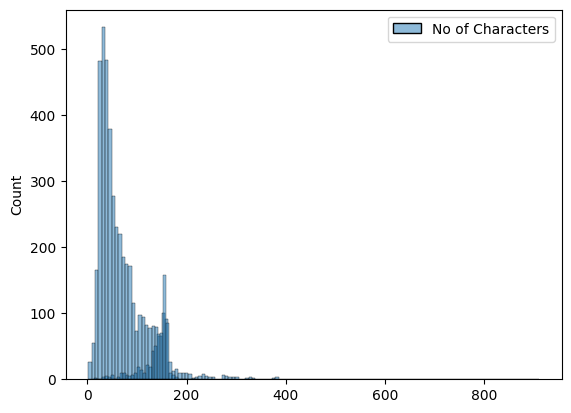

In [80]:
sns.histplot(df[df['Target']==0][['No of Characters']])
sns.histplot(df[df['Target']==1][['No of Characters']],color='red')

In [11]:
df = df[(df['No of Characters']<=500)]
df.shape

(5164, 5)

<Figure size 2000x1200 with 0 Axes>

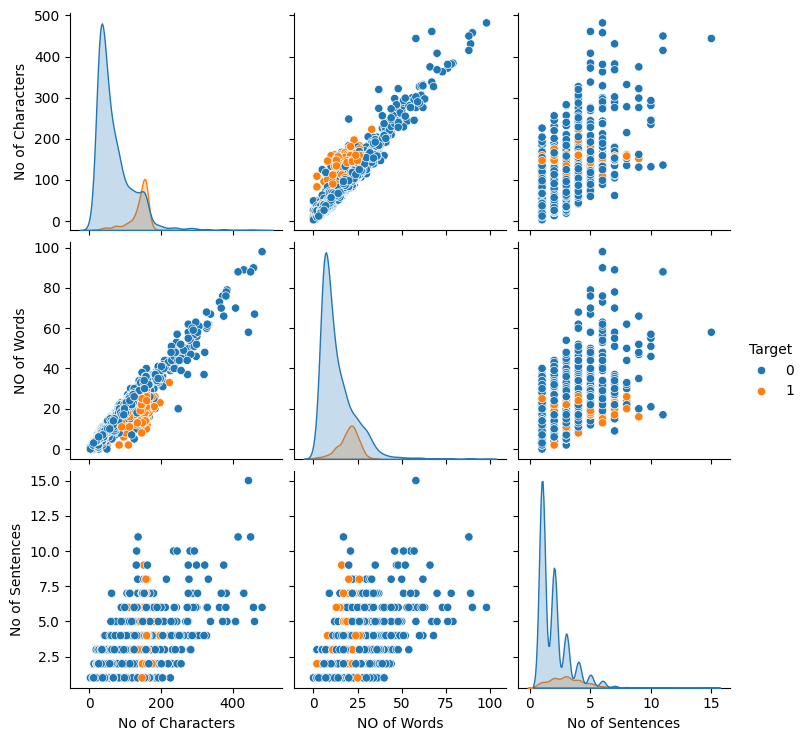

In [12]:

plt.figure(figsize=[20,12])
sns.pairplot(data=df,hue='Target')
plt.show()

In [13]:
import pandas as pd
import re
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Sample input: replace with your actual DataFrame
# df = pd.read_csv("your_file.csv")  # if you’re loading from a file

# Step 1: Clean the text (remove non-alphabets, lowercase, remove extra spaces)
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    return ' '.join(text)

# Step 2: Tokenize text
def tokenize(text):
    return [token.text for token in nlp(text)]

# Step 3: Remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if not nlp.vocab[word].is_stop]

# Step 4: Lemmatize tokens
def lemmatize(tokens):
    doc = nlp(' '.join(tokens))
    return [token.lemma_ for token in doc]

# Apply all steps in one go and store in new columns
df["Clean_Text"] = df["Text"].apply(clean_text)
df["Tokenize_Text"] = df["Clean_Text"].apply(tokenize)
df["Nostopword_Text"] = df["Tokenize_Text"].apply(remove_stopwords)
df["Lemmatized_Text"] = df["Nostopword_Text"].apply(lemmatize)

# Step 5: Create corpus by joining lemmatized words
df["Corpus"] = df["Lemmatized_Text"].apply(lambda tokens: ' '.join(tokens))

# Optional: Display first 5 processed texts
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m", *df["Corpus"].head().tolist(), sep="\n")


 The First 5 lines in corpus :
jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joking wif u oni
free entry wkly comp win fa cup final tkts st text fa receive entry question std txt rate t c s apply s
u dun early hor u c
nah don t think go usf life


In [14]:
df.head()

,Target,Text,No of Characters,NO of Words,No of Sentences,Clean_Text,Tokenize_Text,Nostopword_Text,Lemmatized_Text,Corpus
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[jurong, point, crazy, available, bugis, n, gr...","[jurong, point, crazy, available, bugis, n, gr...",jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,21,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, early, hor, u, c]","[u, dun, early, hor, u, c]",u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, don, t, think, goes, usf, lives]","[nah, don, t, think, go, usf, life]",nah don t think go usf life


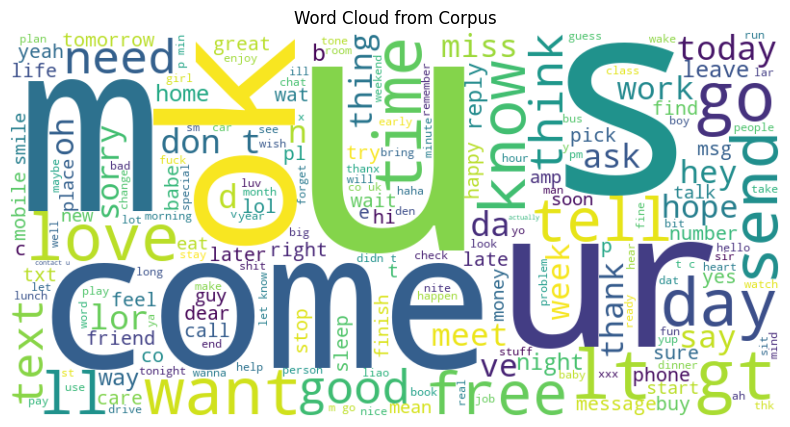

In [87]:
from wordcloud import WordCloud


# Step 1: Combine all text from the 'Corpus' column into one large string
text = ' '.join(df['Corpus'])

# Step 2: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Step 3: Display the word cloud
plt.figure(figsize=(10, 5))          # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Show image with smooth interpolation
plt.axis('off')                      # Hide axes
plt.title('Word Cloud from Corpus')  # Optional title
plt.show()


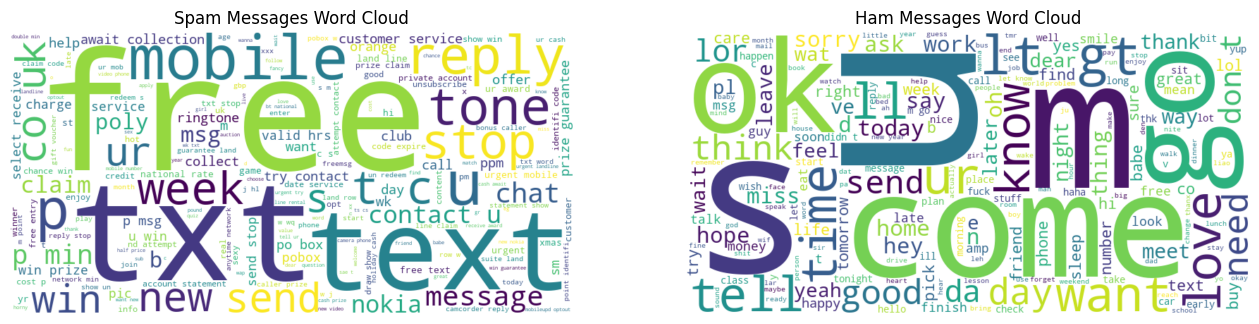

In [89]:


# Assuming you have a column named 'Label' with values like 'spam' and 'ham'
# and a 'Corpus' column with the cleaned text

# Step 1: Separate spam and ham texts
spam_text = ' '.join(df[df['Target'] == 1]['Corpus'])
ham_text = ' '.join(df[df['Target'] == 0]['Corpus'])

# Step 2: Create wordclouds
spam_wc = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Step 3: Plot them side by side
plt.figure(figsize=(16, 8))

# Spam word cloud
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

# Ham word cloud
plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.show()


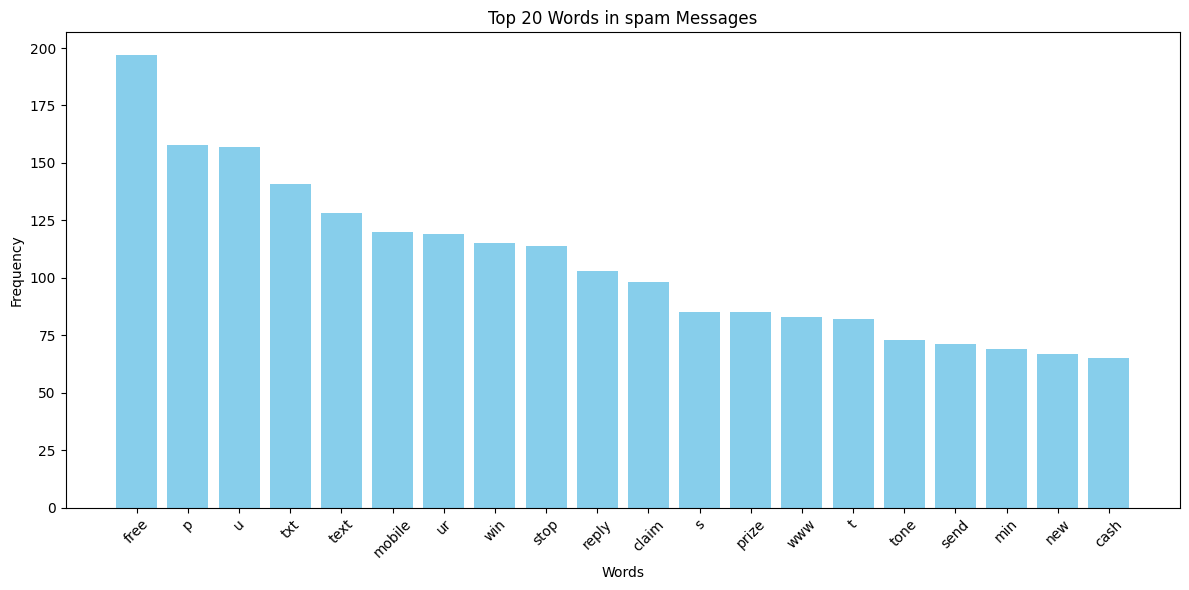

In [92]:

from collections import Counter


# Choose 'spam' or 'ham'
target_label = 1  # or 'ham'=0

# Step 1: Filter messages by label and join all text
text_data = ' '.join(df[df['Target'] == target_label]['Corpus'])

# Step 2: Split into words and count frequencies
words = text_data.split()
word_freq = Counter(words)

# Step 3: Get the most common 20 words
most_common_words = word_freq.most_common(20)

# Step 4: Create DataFrame for plotting
freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Step 5: Plot the barplot
plt.figure(figsize=(12, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xticks(rotation=45)
plt.title(f"Top 20 Words in spam Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# #Changing text data in to numbers.
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df['Corpus']).toarray()
# #Let's have a look at our feature
# X.shape

(5164, 6469)

In [20]:
y= df['Target'].values

In [23]:
X=df['Corpus']
X.shape

(5164,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.astype

<bound method NDFrame.astype of 5015                     hey gal u wanna meet dinner n te
5060                              sorry ll later meet sir
4479                 y not u try new invention fly m joke
1728    request maangalyam alaipayuthe set callertune ...
99                                     don t text anymore
                              ...                        
4748    thanx u darlin m cool thanx bday drink nite mo...
474     nice line say broken heart plz don t cum times...
3272                 finish eat get u plate leftover time
4021    u gd lor shopping get stuff u wan watch infern...
879     u secret admirer look contact u find r reveal ...
Name: Corpus, Length: 4131, dtype: object>

In [34]:
models = [RandomForestClassifier(class_weight='balanced'),SVC(class_weight='balanced',probability=True),MultinomialNB(),KNeighborsClassifier(),ExtraTreesClassifier(class_weight='balanced')]
names= ['rc','svc','mnb','kn','etc']
estimators =list(zip(names,models))

In [35]:
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

In [ ]:
# classifiers = [MultinomialNB(),
#         RandomForestClassifier(),
#             KNeighborsClassifier(n_neighbors=5),
#         SVC(probability=True),
#         BaggingClassifier(estimator=SVC(),n_estimators=10),
#         AdaBoostClassifier(n_estimators=100),
#         ExtraTreesClassifier(),
#         IsolationForest(),
#         XGBClassifier(n_estimators=100,use_label_encoder=False,eval_metric='mlogloss',learning_rate=0.01),
#         ]
# for cls in classifiers:
#     cls.fit(X_train, y_train)

# # Dictionary of pipelines and model types for ease of reference
# pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC",4: "BaggingClassifier",5:"AdaBoostClassifier",6:"ExtraTreesClassifier",7:"IsolationForest",8: "XGBClassifier",9:"VotingClassifier"}

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [07:25:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# # Cossvalidation
# for i, model in enumerate(classifiers):
#     cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=KFold(n_splits=5))
#     print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.958122 
RandomForest: 0.971676 
KNeighbours: 0.902688 
SVC: 0.967561 
BaggingClassifier: 0.963204 
AdaBoostClassifier: 0.925441 
ExtraTreesClassifier: 0.975066 
IsolationForest: 0.128781 


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [08:19:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [08:20:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [08:20:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [08:20:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\lear

XGBClassifier: 0.916729 
VotingClassifier: 0.966350 


In [ ]:
# vc=VotingClassifier(estimators=estimators,voting='soft')
# vc.fit(X_train,y_train)


VotingClassifier(estimators=[('rc',
                              RandomForestClassifier(class_weight='balanced')),
                             ('svc',
                              SVC(class_weight='balanced', probability=True)),
                             ('mnb', MultinomialNB()),
                             ('kn', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
# pred=vc.predict(X_test)


In [ ]:
# preci = metrics.precision_score(y_test, pred)
# recal = metrics.recall_score(y_test, pred)
# f1_s = metrics.f1_score(y_test, pred)
# train_accuracy = vc.score(X_train,y_train)
# test_accuracy = vc.score(X_test,y_test)
# print(preci,recal,f1_s,train_accuracy,test_accuracy)


1.0 0.8 0.8888888888888888 0.9970979443772672 0.971953578336557


In [ ]:
# Model Evaluation
# creating lists of varios scores
# precision =[]
# recall =[]
# f1_score = []
# trainset_accuracy = []
# testset_accuracy = []

# for i in classifiers:
#     pred_train = i.predict(X_train)
#     pred_test = i.predict(X_test)
#     preci = metrics.precision_score(y_test, pred_test)
#     recal = metrics.recall_score(y_test, pred_test)
#     f1_s = metrics.f1_score(y_test, pred_test)
#     train_accuracy = model.score(X_train,y_train)
#     test_accuracy = model.score(X_test,y_test)

#     #Appending scores
#     precision.append(preci)
#     recall.append(recal)
#     f1_score.append(f1_s)
#     trainset_accuracy.append(train_accuracy)
#     testset_accuracy.append(test_accuracy)

In [ ]:
# data = {'Precision':precision,
# 'Recall':recall,
# 'F1score':f1_score,
# 'Accuracy on Testset':testset_accuracy,
# 'Accuracy on Trainset':trainset_accuracy}
# # Creates pandas DataFrame.
# Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC", "BaggingClassifier","AdaBoostClassifier","ExtraTreesClassifier","IsolationForest", "XGBClassifier","VotingClassifier"])

In [ ]:
# cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
# Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,1.000000,0.743802,0.853081,0.976767,0.996369
RandomForest,0.980000,0.809917,0.886878,0.976767,0.996369
KNeighbours,1.000000,0.297521,0.458599,0.976767,0.996369
SVC,0.980000,0.809917,0.886878,0.976767,0.996369
BaggingClassifier,0.978947,0.768595,0.861111,0.976767,0.996369
AdaBoostClassifier,0.944444,0.421488,0.582857,0.976767,0.996369
ExtraTreesClassifier,0.981132,0.859504,0.916300,0.976767,0.996369
IsolationForest,0.117135,1.000000,0.209705,0.976767,0.996369
XGBClassifier,0.944444,0.421488,0.582857,0.976767,0.996369
VotingClassifier,1.000000,0.801653,0.889908,0.976767,0.996369


In [ ]:


# Now split cleanly
# X_train = df["Final_Text"].tolist()

# y= df['Target'].values
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df['Corpus']).toarray()
# # Fit the pipeline
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('clf', SVC(class_weight='balanced'))
# ])

# pipeline.fit(X_train, y_train)

In [36]:
#  The pipeline first vectorizes the text and then applies the voting classifier.
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('voting_classifier', voting_clf)
])

# 6. Train the Pipeline
# The .fit() method will first transform X_train using TfidfVectorizer and then train the VotingClassifier
# on the transformed data and y_train.
pipeline.fit(X_train, y_train)

# 7. Make Predictions on the Test Set
# The .predict() method will first transform X_test using the *same* TfidfVectorizer learned from X_train,
# and then use the trained VotingClassifier to make predictions.
y_pred = pipeline.predict(X_test)

# 8. Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# How to apply the trained model to new, unseen data (e.g., a single message)
new_messages = [
    "Congratulations! You've won a free iPhone. Claim now!",
    "Hey, what are you up to this weekend?",
    "Your prize is waiting! Click here to redeem.",
    "Meeting at 3 PM tomorrow. Don't forget."
]

# Use the trained pipeline to predict on new data
new_predictions = pipeline.predict(new_messages)

print("\nPredictions for new messages:")
for msg, pred in zip(new_messages, new_predictions):
    sentiment = "Spam" if pred == 1 else "Non-Spam"
    print(f"'{msg}' -> {sentiment}")

# If you want to see probabilities (for soft voting)
if hasattr(pipeline.named_steps['voting_classifier'], 'predict_proba'):
    new_probabilities = pipeline.predict_proba(new_messages)
    print("\nProbabilities for new messages (Spam vs Non-Spam):")
    for msg, prob in zip(new_messages, new_probabilities):
        print(f"'{msg}' -> Non-Spam: {prob[0]:.4f}, Spam: {prob[1]:.4f}")

Accuracy: 0.9777347531461762

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       912
           1       0.99      0.82      0.90       121

    accuracy                           0.98      1033
   macro avg       0.98      0.91      0.94      1033
weighted avg       0.98      0.98      0.98      1033


Predictions for new messages:
'Congratulations! You've won a free iPhone. Claim now!' -> Non-Spam
'Hey, what are you up to this weekend?' -> Non-Spam
'Your prize is waiting! Click here to redeem.' -> Non-Spam
'Meeting at 3 PM tomorrow. Don't forget.' -> Non-Spam

Probabilities for new messages (Spam vs Non-Spam):
'Congratulations! You've won a free iPhone. Claim now!' -> Non-Spam: 0.5268, Spam: 0.4732
'Hey, what are you up to this weekend?' -> Non-Spam: 0.9961, Spam: 0.0039
'Your prize is waiting! Click here to redeem.' -> Non-Spam: 0.6442, Spam: 0.3558
'Meeting at 3 PM tomorrow. Don't forget.' -> Non-Spam: 0.9

In [2]:
import joblib
joblib.dump(pipeline,"Pipeline.joblib")
pipeline=joblib.load("Pipeline.joblib")


NameError: name 'pipeline' is not defined

In [1]:
import joblib
joblib.dump(pipeline,"model.joblib")

NameError: name 'pipeline' is not defined